# Mental health classification 

# problem statement

Given the RHMCD-20 dataset containing information about individuals' struggles based on occupation, days spent indoors, mental health history, and other features, the goal of this machine learning project is to develop a predictive model that can accurately classify individuals into different coping strategies categories based on their characteristics.

# summary

Data:
The dataset consists of 824 rows and 13 columns.

Exploratory Data Analysis (EDA):

The dataset is predominantly composed of females, with fewer males. Individuals aged 30 and above, as well as students and housewives, are more represented. Students and those in business appear to be more affected by mental health issues. Social weakness is more prevalent among females. Individuals with social weakness tend to have more coping struggles. Females exhibit more mood swings than males, and those with low mood swings tend to have more coping struggles. Mental health history is more prevalent among females. Many individuals are not interested in their jobs, which often leads to disturbances in mental health.

Feature Engineering:

The dataset was examined for null values and categorical values were labeled.

Data Preprocessing:

The data was split into training and testing datasets.

Model Building and Evaluation:

Various classification models including Logistic Regression, K-Nearest Neighbors (KNN), Decision Trees, Random Forest, and Support Vector Machine (SVM) were trained and tested. The Logistic Regression Classifier achieved the highest accuracy of 53.62%.

# Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# DATA GATHREING

In [3]:
df=pd.read_csv(r"C:\Users\GHANWAT\OneDrive\Desktop\mental_health_finaldata_1.csv")

In [4]:
df

,ID,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,1,20-25,Female,Corporate,1-14 days,Yes,No,Yes,Yes,Medium,No,No,Yes
1,2,30-Above,Male,Others,31-60 days,Yes,Maybe,No,No,High,No,No,Yes
2,3,30-Above,Female,Student,Go out Every day,No,Yes,No,No,Medium,Yes,Maybe,No
3,4,25-30,Male,Others,1-14 days,Yes,Maybe,No,Maybe,Medium,No,Maybe,Yes
4,5,16-20,Female,Student,More than 2 months,Yes,Yes,No,Yes,Medium,Yes,Maybe,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,820,20-25,Male,Corporate,Go out Every day,No,No,Yes,Yes,Medium,No,Yes,Maybe
820,821,20-25,Male,Others,1-14 days,Yes,No,Yes,Maybe,Low,No,Maybe,Maybe
821,822,20-25,Male,Student,More than 2 months,Yes,Maybe,No,Yes,High,Yes,Yes,Maybe
822,823,16-20,Male,Business,15-30 days,No,Maybe,No,Maybe,Low,Yes,No,Maybe


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     824 non-null    int64 
 1   Age                    824 non-null    object
 2   Gender                 824 non-null    object
 3   Occupation             824 non-null    object
 4   Days_Indoors           824 non-null    object
 5   Growing_Stress         824 non-null    object
 6   Changes_Habits         824 non-null    object
 7   Mental_Health_History  824 non-null    object
 8   Weight_Change          824 non-null    object
 9   Mood_Swings            824 non-null    object
 10  Coping_Struggles       824 non-null    object
 11  Work_Interest          824 non-null    object
 12  Social_Weakness        824 non-null    object
dtypes: int64(1), object(12)
memory usage: 83.8+ KB


# EDA

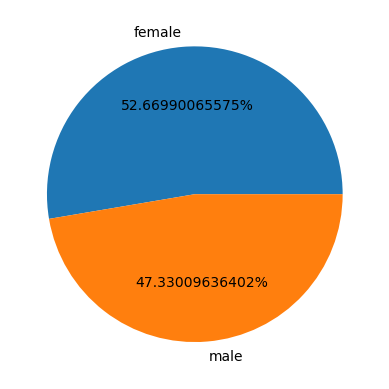

In [6]:
labels=("female","male")
y=[434,390]
plt.pie(y,labels=labels,autopct="%1.11f%%");

In this dataset female is greater than male. 

<Axes: xlabel='Age', ylabel='count'>

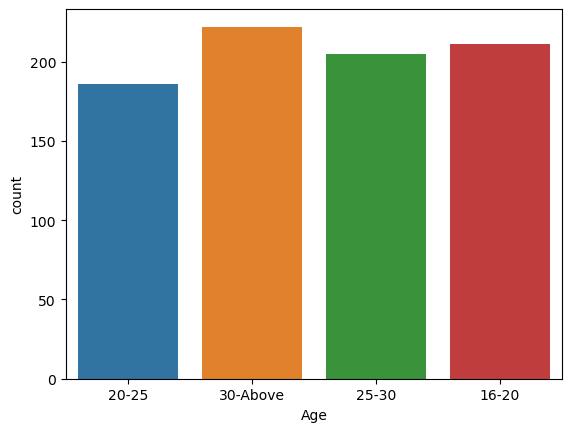

In [7]:
sns.countplot(data=df,x="Age")

in this dataset 30 above age group is greter .

Text(0.5, 1.0, 'Barplot')

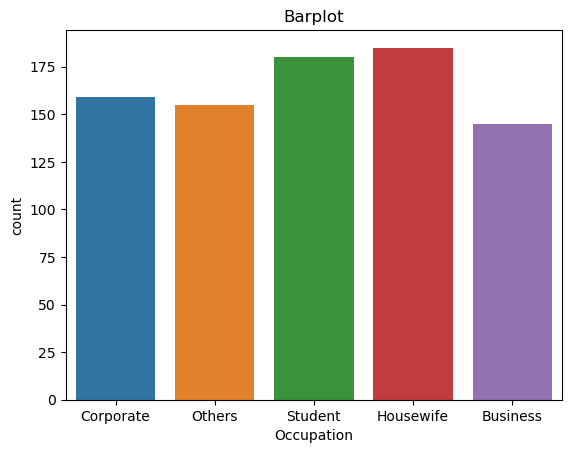

In [8]:
sns.countplot(data=df, x="Occupation");
plt.title("Barplot")

Text(0.5, 1.0, 'Barplot')

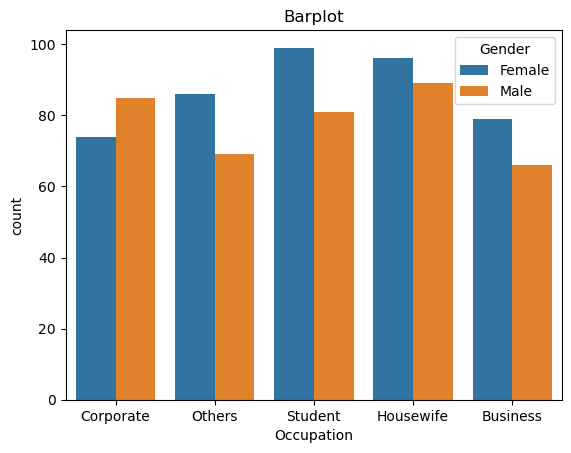

In [13]:
sns.countplot(data=df, x="Occupation",hue="Gender");
plt.title("Barplot")

Text(0.5, 1.0, 'Barplot')

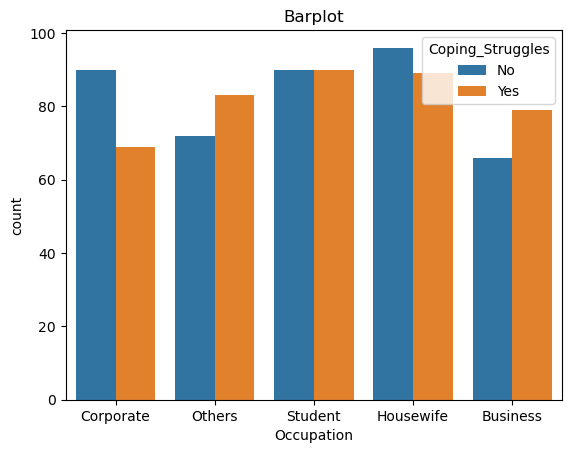

In [12]:
sns.countplot(data=df, x="Occupation",hue="Coping_Struggles");
plt.title("Barplot")

<Axes: xlabel='Days_Indoors', ylabel='count'>

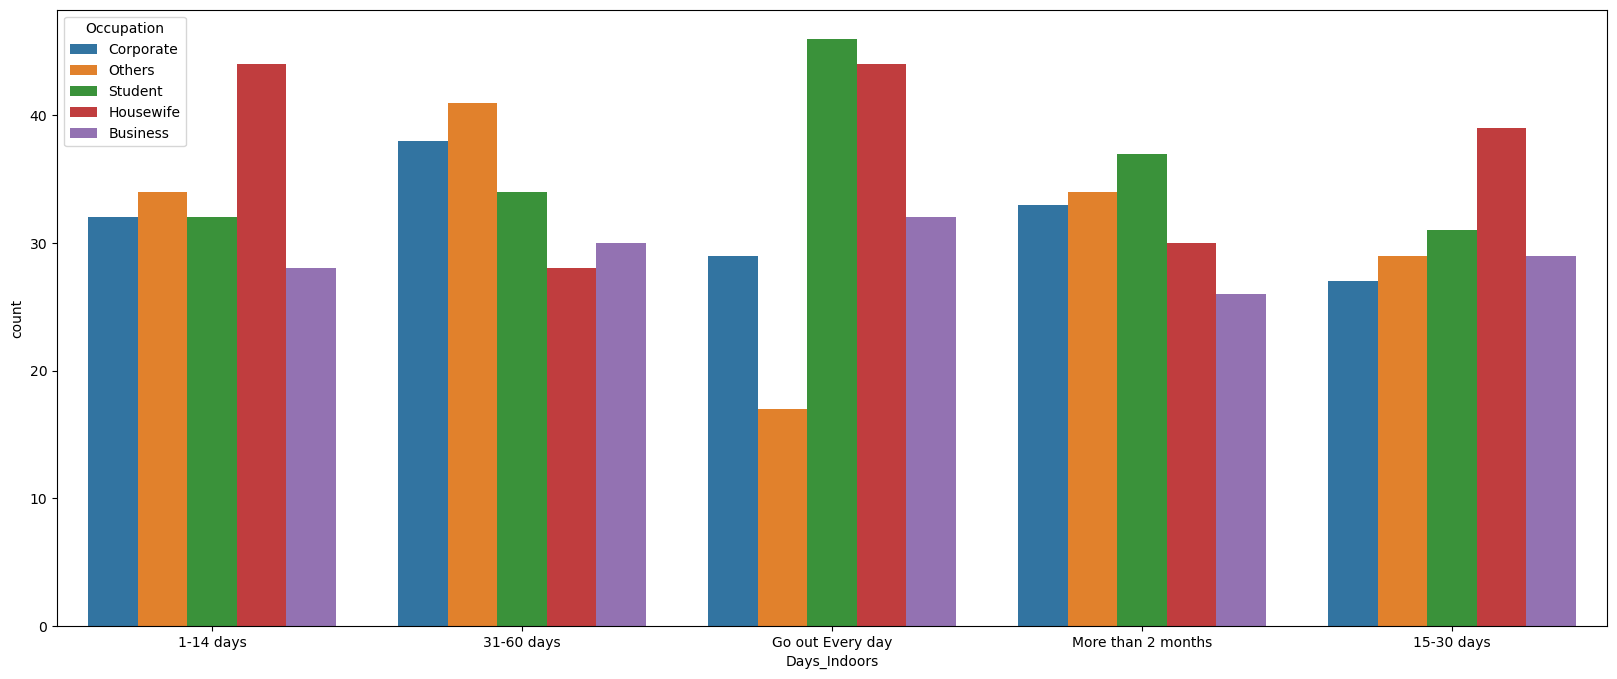

In [10]:
plt.figure(figsize=(20,8))
sns.countplot(data=df,x="Days_Indoors",hue="Occupation")

In [10]:
df["Days_Indoors"].value_counts().to_dict

<bound method Series.to_dict of Days_Indoors
31-60 days            171
1-14 days             170
Go out Every day      168
More than 2 months    160
15-30 days            155
Name: count, dtype: int64>

Text(0.5, 1.0, 'pieplot')

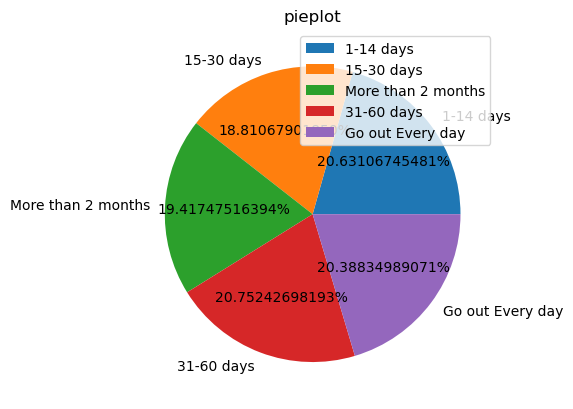

In [11]:
labels=("1-14 days","15-30 days","More than 2 months","31-60 days","Go out Every day")
y=[170,155,160,171,168]
plt.pie(y,labels=labels,autopct="%1.11f%%")
plt.legend()
plt.title("pieplot")

<Axes: xlabel='Social_Weakness', ylabel='count'>

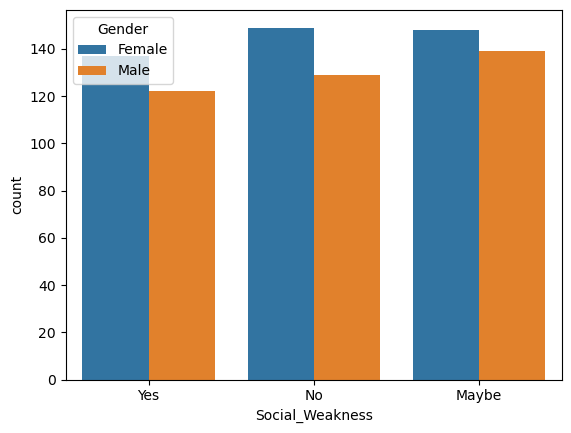

In [12]:
sns.countplot(data=df,x="Social_Weakness",hue="Gender")

<Axes: xlabel='Social_Weakness', ylabel='count'>

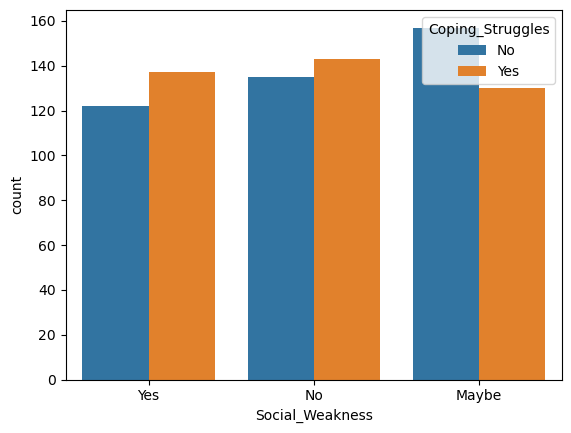

In [14]:
sns.countplot(data=df,x="Social_Weakness",hue="Coping_Struggles")

<Axes: xlabel='Mood_Swings', ylabel='count'>

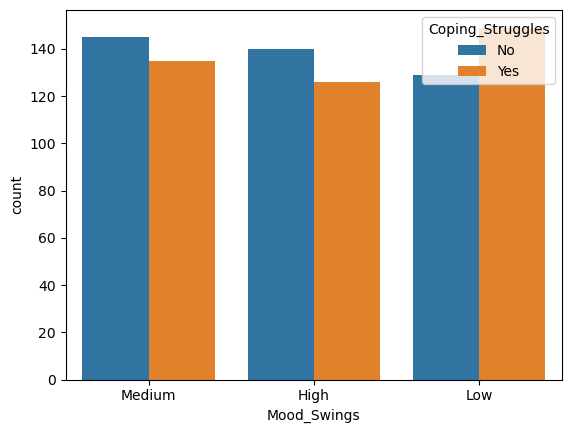

In [16]:
sns.countplot(data=df,x="Mood_Swings",hue="Coping_Struggles")

<Axes: xlabel='Mood_Swings', ylabel='count'>

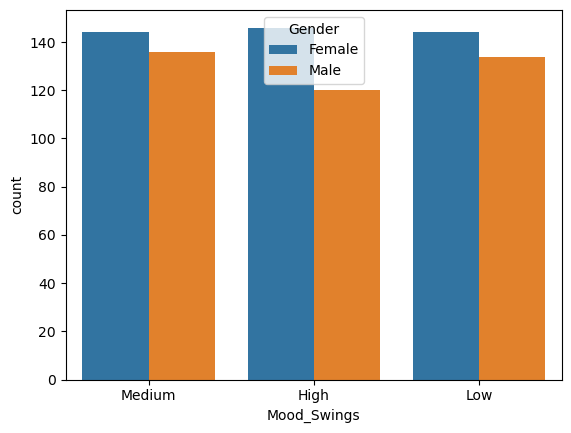

In [17]:
sns.countplot(data=df,x="Mood_Swings",hue="Gender")

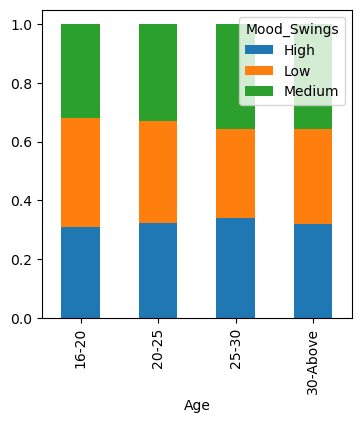

In [14]:
gender = pd.crosstab(df['Age'],df['Mood_Swings'])
gender.div(gender.sum(1).astype(float),axis = 0).plot(kind='bar',stacked=True,figsize=(4,4))
gender
plt.show()

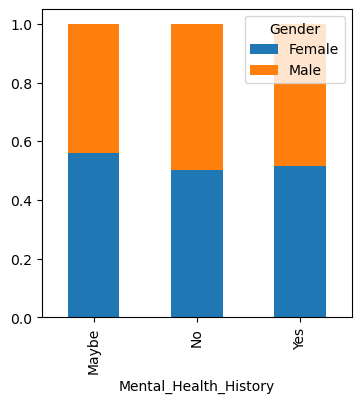

In [15]:
gender = pd.crosstab(df['Mental_Health_History'],df['Gender'])
gender.div(gender.sum(1).astype(float),axis = 0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

<Axes: xlabel='Mental_Health_History', ylabel='count'>

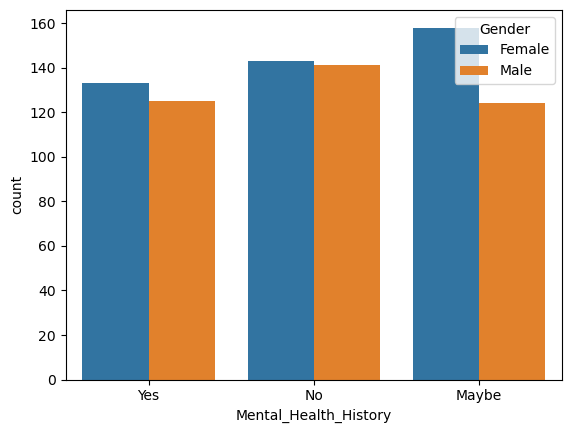

In [18]:
#sns.countplot(data=df,x="Mental_Health_History",hue="Gender")

In [16]:
df["Work_Interest"].value_counts()

Work_Interest
No       295
Maybe    281
Yes      248
Name: count, dtype: int64

Text(0.5, 1.0, 'Work_Interest')

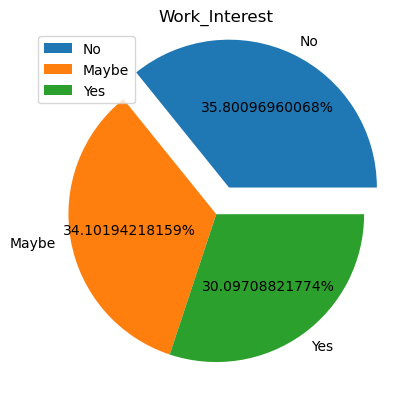

In [17]:
labels=("No","Maybe","Yes")
y=[295,281,248]
ex=(0.2,0,0)
plt.pie(y,labels=labels,autopct="%1.11f%%",explode=ex);
plt.legend()
plt.title("Work_Interest")

<Axes: xlabel='Work_Interest', ylabel='count'>

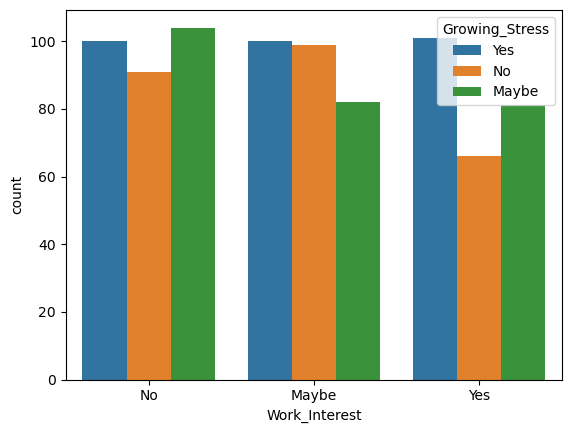

In [18]:
sns.countplot(data=df,x="Work_Interest",hue="Growing_Stress")

<Axes: xlabel='Social_Weakness', ylabel='count'>

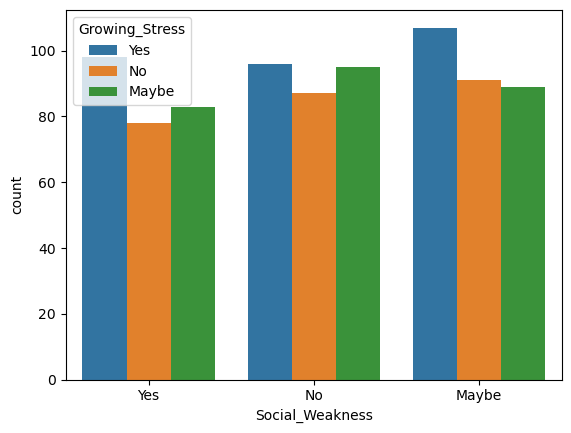

In [23]:
sns.countplot(data=df,x="Social_Weakness",hue="Growing_Stress")

<Axes: xlabel='Growing_Stress', ylabel='count'>

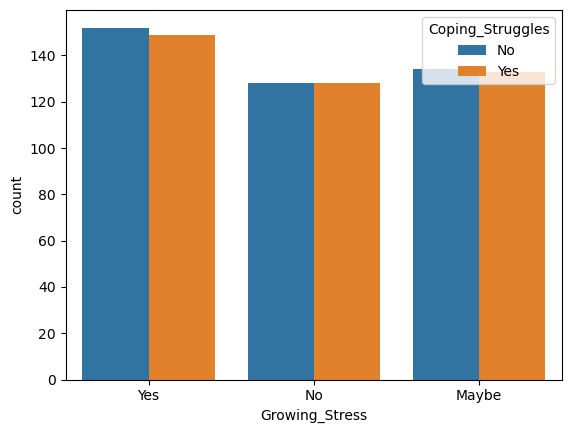

In [20]:
sns.countplot(data=df,x="Growing_Stress",hue="Coping_Struggles")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     824 non-null    int64 
 1   Age                    824 non-null    object
 2   Gender                 824 non-null    object
 3   Occupation             824 non-null    object
 4   Days_Indoors           824 non-null    object
 5   Growing_Stress         824 non-null    object
 6   Changes_Habits         824 non-null    object
 7   Mental_Health_History  824 non-null    object
 8   Weight_Change          824 non-null    object
 9   Mood_Swings            824 non-null    object
 10  Coping_Struggles       824 non-null    object
 11  Work_Interest          824 non-null    object
 12  Social_Weakness        824 non-null    object
dtypes: int64(1), object(12)
memory usage: 83.8+ KB


# feature engineering

In [23]:
df["Gender"].value_counts().to_dict


<bound method Series.to_dict of Gender
Female    434
Male      390
Name: count, dtype: int64>

In [24]:
df["Gender"].replace({"Female":1,"Male":0},inplace=True)


In [25]:
df["Occupation"].value_counts().to_dict

<bound method Series.to_dict of Occupation
Housewife    185
Student      180
Corporate    159
Others       155
Business     145
Name: count, dtype: int64>

In [26]:
df["Occupation"].replace({"Others":0,"Housewife":1,"Student":2,"Corporate":3,"Business":4},inplace=True)

In [27]:
df["Growing_Stress"].value_counts().to_dict

<bound method Series.to_dict of Growing_Stress
Yes      301
Maybe    267
No       256
Name: count, dtype: int64>

In [28]:
df["Growing_Stress"].replace({"No":0,"Maybe":1,"Yes":2},inplace=True)

In [29]:
df["Changes_Habits"].value_counts().to_dict

<bound method Series.to_dict of Changes_Habits
Yes      305
Maybe    268
No       251
Name: count, dtype: int64>

In [30]:
df["Changes_Habits"].replace({"No":0,"Maybe":1,"Yes":2},inplace=True)

In [31]:
df["Mental_Health_History"].value_counts().to_dict

<bound method Series.to_dict of Mental_Health_History
No       284
Maybe    282
Yes      258
Name: count, dtype: int64>

In [32]:
df["Mental_Health_History"].replace({"No":0,"Maybe":1,"Yes":2},inplace=True)

In [33]:
df["Weight_Change"].value_counts().to_dict

<bound method Series.to_dict of Weight_Change
Maybe    281
No       275
Yes      268
Name: count, dtype: int64>

In [34]:
df["Weight_Change"].replace({"No":0,"Maybe":1,"Yes":2},inplace=True)

In [35]:
df["Mood_Swings"].value_counts().to_dict

<bound method Series.to_dict of Mood_Swings
Medium    280
Low       278
High      266
Name: count, dtype: int64>

In [36]:
df["Mood_Swings"].replace({"Low":0,"Medium":1,"High":2},inplace=True)

In [37]:
df["Coping_Struggles"].value_counts().to_dict

<bound method Series.to_dict of Coping_Struggles
No     414
Yes    410
Name: count, dtype: int64>

In [38]:
df["Coping_Struggles"].replace({"No":0,"Yes":1},inplace=True)

In [39]:
df["Work_Interest"].value_counts().to_dict

<bound method Series.to_dict of Work_Interest
No       295
Maybe    281
Yes      248
Name: count, dtype: int64>

In [40]:
df["Work_Interest"].replace({"No":0,"Maybe":1,"Yes":2},inplace=True)

In [41]:
df["Social_Weakness"].value_counts().to_dict

<bound method Series.to_dict of Social_Weakness
Maybe    287
No       278
Yes      259
Name: count, dtype: int64>

In [42]:
df["Social_Weakness"].replace({"No":0,"Maybe":1,"Yes":2},inplace=True)

In [43]:
df["Days_Indoors"].value_counts().to_dict

<bound method Series.to_dict of Days_Indoors
31-60 days            171
1-14 days             170
Go out Every day      168
More than 2 months    160
15-30 days            155
Name: count, dtype: int64>

In [44]:
df["Days_Indoors"].replace({"1-14 days":0,"15-30 days":1,"31-60 days":2,"More than 2 months":3,"Go out Every day":4},inplace=True)

In [45]:
df["Age"].value_counts().to_dict

<bound method Series.to_dict of Age
30-Above    222
16-20       211
25-30       205
20-25       186
Name: count, dtype: int64>

In [46]:
df["Age"].replace({"16-20":0,"20-25":1,"25-30":2,"30-Above":3},inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   ID                     824 non-null    int64
 1   Age                    824 non-null    int64
 2   Gender                 824 non-null    int64
 3   Occupation             824 non-null    int64
 4   Days_Indoors           824 non-null    int64
 5   Growing_Stress         824 non-null    int64
 6   Changes_Habits         824 non-null    int64
 7   Mental_Health_History  824 non-null    int64
 8   Weight_Change          824 non-null    int64
 9   Mood_Swings            824 non-null    int64
 10  Coping_Struggles       824 non-null    int64
 11  Work_Interest          824 non-null    int64
 12  Social_Weakness        824 non-null    int64
dtypes: int64(13)
memory usage: 83.8 KB


In [48]:
df

,ID,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,1,1,1,3,0,2,0,2,2,1,0,0,2
1,2,3,0,0,2,2,1,0,0,2,0,0,2
2,3,3,1,2,4,0,2,0,0,1,1,1,0
3,4,2,0,0,0,2,1,0,1,1,0,1,2
4,5,0,1,2,3,2,2,0,2,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,820,1,0,3,4,0,0,2,2,1,0,2,1
820,821,1,0,0,0,2,0,2,1,0,0,1,1
821,822,1,0,2,3,2,1,0,2,2,1,2,1
822,823,0,0,4,1,0,1,0,1,0,1,0,1


# scaling data

In [144]:
from sklearn.preprocessing import StandardScaler

In [145]:
scaler=StandardScaler()

In [146]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# Train Test split

In [147]:
from sklearn.model_selection import train_test_split


In [148]:
x=df.drop(["Coping_Struggles","ID"],axis=1)
y=df["Coping_Struggles"]

In [149]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3 ,random_state=1, stratify= y)
x_train

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Work_Interest,Social_Weakness
386,2,0,2,0,2,2,2,1,1,1,0
436,2,0,1,3,2,2,1,0,2,0,2
564,0,1,1,1,2,0,0,1,2,1,2
334,2,0,1,3,0,2,2,2,0,0,0
569,0,1,3,4,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
156,2,0,1,4,2,2,2,0,2,2,2
780,3,0,1,2,2,0,2,1,1,2,1
555,1,1,3,0,1,1,1,2,2,2,0
28,1,1,0,0,2,1,1,2,2,0,2


In [150]:
y_train

386    1
436    0
564    1
334    1
569    1
      ..
156    0
780    0
555    1
28     1
179    1
Name: Coping_Struggles, Length: 576, dtype: int64

In [151]:
x_test

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Work_Interest,Social_Weakness
88,2,0,0,1,2,2,1,2,2,0,1
506,2,1,1,1,0,2,1,1,1,0,0
360,1,0,0,3,1,2,2,0,0,0,0
22,3,1,2,2,2,0,1,0,1,0,1
754,1,1,2,2,1,2,1,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
63,0,0,2,4,2,0,1,2,2,1,2
263,3,0,3,0,0,2,0,0,1,0,1
131,1,1,2,2,0,0,2,2,2,2,0
14,3,1,1,0,0,0,1,1,1,0,1


In [152]:
y_test

88     0
506    0
360    0
22     1
754    1
      ..
63     1
263    1
131    0
14     0
370    0
Name: Coping_Struggles, Length: 248, dtype: int64

In [153]:
y_train.value_counts()/len(y_train)

Coping_Struggles
0    0.501736
1    0.498264
Name: count, dtype: float64

In [154]:
y_test.value_counts()/len(y_test)

Coping_Struggles
0    0.504032
1    0.495968
Name: count, dtype: float64

# logistic regression

In [155]:
from sklearn.linear_model import LogisticRegression

In [156]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

## Evalution  (train)

In [157]:
y_pred_log=log_reg.predict(x_train)
cnf_matrix=confusion_matrix(y_train,y_pred_log)
print("Confusion_matrix :\n",cnf_matrix)
acc_score_log_train= accuracy_score(y_train,y_pred_log)
print("accuracy_score ",acc_score_log_train)
clf_report= classification_report(y_train,y_pred_log)
print("classification_report",clf_report)

Confusion_matrix :
 [[174 115]
 [144 143]]
accuracy_score  0.5503472222222222
classification_report               precision    recall  f1-score   support

           0       0.55      0.60      0.57       289
           1       0.55      0.50      0.52       287

    accuracy                           0.55       576
   macro avg       0.55      0.55      0.55       576
weighted avg       0.55      0.55      0.55       576



## Evalution  (test)

In [158]:
y_pred_log=log_reg.predict(x_test)
cnf_matrix=confusion_matrix(y_test,y_pred_log)
print("Confusion_matrix :\n",cnf_matrix)
acc_score_log_test= accuracy_score(y_test,y_pred_log)
print("accuracy_score ",acc_score_log_test)
clf_report= classification_report(y_test,y_pred_log)
print("classification_report : \n",clf_report)

Confusion_matrix :
 [[73 52]
 [63 60]]
accuracy_score  0.5362903225806451
classification_report : 
               precision    recall  f1-score   support

           0       0.54      0.58      0.56       125
           1       0.54      0.49      0.51       123

    accuracy                           0.54       248
   macro avg       0.54      0.54      0.54       248
weighted avg       0.54      0.54      0.54       248



# K- Nearest Neighbor

In [176]:
from sklearn.neighbors import KNeighborsClassifier

In [177]:
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)


KNeighborsClassifier()

# evalution train

In [179]:
y_pred_knn=knn_model.predict(x_train)
cnf=confusion_matrix(y_train,y_pred_knn)
print("confusion_matrix : \n",cnf)
acc_score_knn_train=accuracy_score(y_train,y_pred_knn)
print("accuracy_score :",acc_score_knn_train)
clf_report=classification_report(y_train,y_pred_knn)
print("classification_report", clf_report)

confusion_matrix : 
 [[200  89]
 [ 94 193]]
accuracy_score : 0.6822916666666666
classification_report               precision    recall  f1-score   support

           0       0.68      0.69      0.69       289
           1       0.68      0.67      0.68       287

    accuracy                           0.68       576
   macro avg       0.68      0.68      0.68       576
weighted avg       0.68      0.68      0.68       576



# evalution test

In [181]:
y_pred_knn=knn_model.predict(x_test)
cnf=confusion_matrix(y_test,y_pred_knn)
print("confusion_matrix : \n",cnf)
acc_score_knn_test=accuracy_score(y_test,y_pred_knn)
print("accuracy_score :",acc_score_knn_test)
clf_report=classification_report(y_test,y_pred_knn)
print("classification_report", clf_report)

confusion_matrix : 
 [[64 61]
 [67 56]]
accuracy_score : 0.4838709677419355
classification_report               precision    recall  f1-score   support

           0       0.49      0.51      0.50       125
           1       0.48      0.46      0.47       123

    accuracy                           0.48       248
   macro avg       0.48      0.48      0.48       248
weighted avg       0.48      0.48      0.48       248



# Decision tree

In [104]:
from sklearn.tree import DecisionTreeClassifier

In [105]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

# Model evalution

In [107]:
y_pred_test = dt_model.predict(x_test)

Cnf_matrix = confusion_matrix(y_test,y_pred_test)
print('\nConfusion Matrix is :\n', Cnf_matrix)

acc_score = accuracy_score(y_test,y_pred_test)
print('\nAccuracy Score :\n', acc_score)

clf_report = classification_report(y_test,y_pred_test)
print('\nClassification Report:\n', clf_report)


Confusion Matrix is :
 [[69 56]
 [63 60]]

Accuracy Score :
 0.5201612903225806

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.55      0.54       125
           1       0.52      0.49      0.50       123

    accuracy                           0.52       248
   macro avg       0.52      0.52      0.52       248
weighted avg       0.52      0.52      0.52       248



In [108]:
## Training Data
y_pred_train = dt_model.predict(x_train)

Cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('\nConfusion Matrix is :\n', Cnf_matrix)

acc_score = accuracy_score(y_train,y_pred_train)
print('\nAccuracy Score :\n', acc_score)

clf_report = classification_report(y_train,y_pred_train)
print('\nClassification Report:\n', clf_report)


Confusion Matrix is :
 [[289   0]
 [  0 287]]

Accuracy Score :
 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       289
           1       1.00      1.00      1.00       287

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



# Hyperparameter Tunning

In [109]:
dt_model = DecisionTreeClassifier()

hyp= {'criterion' : ['gini','entropy'],
'max_depth': np.arange(1,15),
'min_samples_leaf':np.arange(2,10), 
'min_samples_split':np.arange(2,20)}

gscv_dt_model = GridSearchCV(dt_model, hyp, cv=7)
gscv_dt_model.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [110]:
gscv_dt_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=2,
                       min_samples_split=8)

In [111]:
## Testing Data after hyper parameter tunning
dt_model= gscv_dt_model.best_estimator_
dt_model.fit(x_train,y_train)

y_pred_test = dt_model.predict(x_test)

Cnf_matrix = confusion_matrix(y_test,y_pred_test)
print('\nConfusion Matrix is :\n', Cnf_matrix)

acc_score = accuracy_score(y_test,y_pred_test)
print('\nAccuracy Score :\n', acc_score)

clf_report = classification_report(y_test,y_pred_test)
print('\nClassification Report:\n', clf_report)


Confusion Matrix is :
 [[85 40]
 [76 47]]

Accuracy Score :
 0.532258064516129

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.68      0.59       125
           1       0.54      0.38      0.45       123

    accuracy                           0.53       248
   macro avg       0.53      0.53      0.52       248
weighted avg       0.53      0.53      0.52       248



# Random forest 

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [115]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

#  evalution train

In [117]:
y_pred_rf = rf_model.predict(x_train)

Cnf_matrix = confusion_matrix(y_train,y_pred_rf)
print('\nConfusion Matrix is :\n', Cnf_matrix)

acc_score_dt_train = accuracy_score(y_train,y_pred_rf)
print('\nAccuracy Score :\n', acc_score_dt_train)

clf_report = classification_report(y_train,y_pred_rf)
print('\nClassification Report:\n', clf_report)


Confusion Matrix is :
 [[289   0]
 [  0 287]]

Accuracy Score :
 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       289
           1       1.00      1.00      1.00       287

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



# Evalution for test

In [118]:
y_pred_rf = rf_model.predict(x_test)

Cnf_matrix = confusion_matrix(y_test,y_pred_rf)
print('\nConfusion Matrix is :\n', Cnf_matrix)

acc_score_test_hyp_dt = accuracy_score(y_test,y_pred_rf)
print('\nAccuracy Score :\n', acc_score_test_hyp_dt)

clf_report = classification_report(y_test,y_pred_rf)
print('\nClassification Report:\n', clf_report)


Confusion Matrix is :
 [[63 62]
 [62 61]]

Accuracy Score :
 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50       125
           1       0.50      0.50      0.50       123

    accuracy                           0.50       248
   macro avg       0.50      0.50      0.50       248
weighted avg       0.50      0.50      0.50       248



In [119]:
rf_model = RandomForestClassifier()

hyp = {'criterion': ['gini','entropy'],
       'n_estimators': np.arange(10,200,10),
       'max_depth': np.arange(2,10),
       'min_samples_split': np.arange(2,20),
       'min_samples_leaf': np.arange(2,10)}

rscv_rf_clf = RandomizedSearchCV(rf_model, hyp, cv=7)
rscv_rf_clf.fit(x_train,y_train)

RandomizedSearchCV(cv=7, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])})

In [120]:
rscv_rf_clf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=19, n_estimators=30)

In [121]:
rf_model = RandomForestClassifier(max_depth=8, 
                                  min_samples_leaf=2,
                                  min_samples_split=8, 
                                  n_estimators=80,
                                  max_features='sqrt',
                                  oob_score = True) # log2(no. of features)
rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=8,
                       n_estimators=80, oob_score=True)

In [122]:
# Train data Accuracy
y_pred_train = rf_model.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('\nConfusion MAtrix: ')
print(cnf_matrix)

acc_score_train_hyp_rf = accuracy_score(y_train,y_pred_train)
print('\nAccuracy score is', acc_score_train_hyp_rf)

clf_report = classification_report(y_train,y_pred_train)
print('\nClassification Report:\n', clf_report)


Confusion MAtrix: 
[[275  14]
 [ 16 271]]

Accuracy score is 0.9479166666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       289
           1       0.95      0.94      0.95       287

    accuracy                           0.95       576
   macro avg       0.95      0.95      0.95       576
weighted avg       0.95      0.95      0.95       576



In [123]:
# Test data Accuracy
y_pred = rf_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print('\nConfusion MAtrix:\n ',cnf_matrix)

acc_score_test_hyp_rf = accuracy_score(y_test,y_pred)
print('\nAccuracy score is\n', acc_score_test_hyp_rf)

clf_report = classification_report(y_test,y_pred)
print('\nClassification Report:\n', clf_report)


Confusion MAtrix:
  [[67 58]
 [70 53]]

Accuracy score is
 0.4838709677419355

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.54      0.51       125
           1       0.48      0.43      0.45       123

    accuracy                           0.48       248
   macro avg       0.48      0.48      0.48       248
weighted avg       0.48      0.48      0.48       248



In [125]:
rf_model.oob_score_

0.5034722222222222

# SVM

In [126]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC


In [127]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(x_train, y_train)
    svc_scores.append(round(svc_classifier.score(x_test, y_test),2))

In [128]:
svm=SVC(probability=True)
svm.fit(x_train,y_train)

SVC(probability=True)

In [129]:
y_pred_train = svm.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix\n", cnf_matrix)
acc_score_train_svm= accuracy_score(y_train,y_pred_train)
print('Accuracy is:', acc_score_train_svm)


Clf = classification_report(y_train,y_pred_train)
print('Classification Report : \n', Clf)

Confusion Matrix
 [[212  77]
 [ 73 214]]
Accuracy is: 0.7395833333333334
Classification Report : 
               precision    recall  f1-score   support

           0       0.74      0.73      0.74       289
           1       0.74      0.75      0.74       287

    accuracy                           0.74       576
   macro avg       0.74      0.74      0.74       576
weighted avg       0.74      0.74      0.74       576



In [130]:
y_pred_test = svm.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_test)
print('Confusion Matrix: \n', cnf_matrix)

acc_score_test_svm= accuracy_score(y_test,y_pred_test)
print('Accuracy is:', acc_score_test_svm)


Clf = classification_report(y_test,y_pred_test)
print('Classification Report: \n', Clf)

Confusion Matrix: 
 [[59 66]
 [60 63]]
Accuracy is: 0.49193548387096775
Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.47      0.48       125
           1       0.49      0.51      0.50       123

    accuracy                           0.49       248
   macro avg       0.49      0.49      0.49       248
weighted avg       0.49      0.49      0.49       248



In [182]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN',  'Decision Tree Classifier', 'Random Forest Classifier',"SVM"],
    'Score': [acc_score_log_test,acc_score_knn_test,acc_score_test_hyp_dt,acc_score_test_hyp_rf,acc_score_test_svm]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Logistic Regression,0.536290
2,Decision Tree Classifier,0.500000
4,SVM,0.491935
1,KNN,0.483871
3,Random Forest Classifier,0.483871


Best model for Cardiovasculer risk is Logistic Regression Classifier	 with an accuracy of 53.62%.